<a href="https://colab.research.google.com/github/SachinScaler/MachineLearning_Jan24/blob/main/Decision_Tree_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Download and Load Data:

In [ ]:
#!gdown 19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
# !gdown 1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
# !gdown 1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
# !gdown 12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG

In [ ]:
!git clone https://github.com/SachinScaler/MachineLearning_Jan23.git

Cloning into 'MachineLearning_Jan23'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 20 (delta 3), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (20/20), 6.69 MiB | 12.17 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [ ]:
import pickle
# Load data (deserialize)
with open('MachineLearning_Jan23/employee_attrition_dataset/preprocessed_X_sm.pickle', 'rb') as handle:
    X_train = pickle.load(handle)

with open('MachineLearning_Jan23/employee_attrition_dataset/X_test.pickle', 'rb') as handle:
    X_test = pickle.load(handle)

with open('MachineLearning_Jan23/employee_attrition_dataset/y_sm.pickle', 'rb') as handle:
    y_train = pickle.load(handle)

with open('MachineLearning_Jan23/employee_attrition_dataset/y_test.pickle', 'rb') as handle:
    y_test = pickle.load(handle)

In [ ]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# create instance of DT Class:
model = DecisionTreeClassifier(criterion='gini')

# fit model
model.fit(X_train, y_train)

# Calculate Train and Test Acc Scores
print("Train Acc:", model.score(X_train, y_train))
print("Test Acc:", model.score(X_test, y_test))

Train Acc: 1.0
Test Acc: 0.7418478260869565


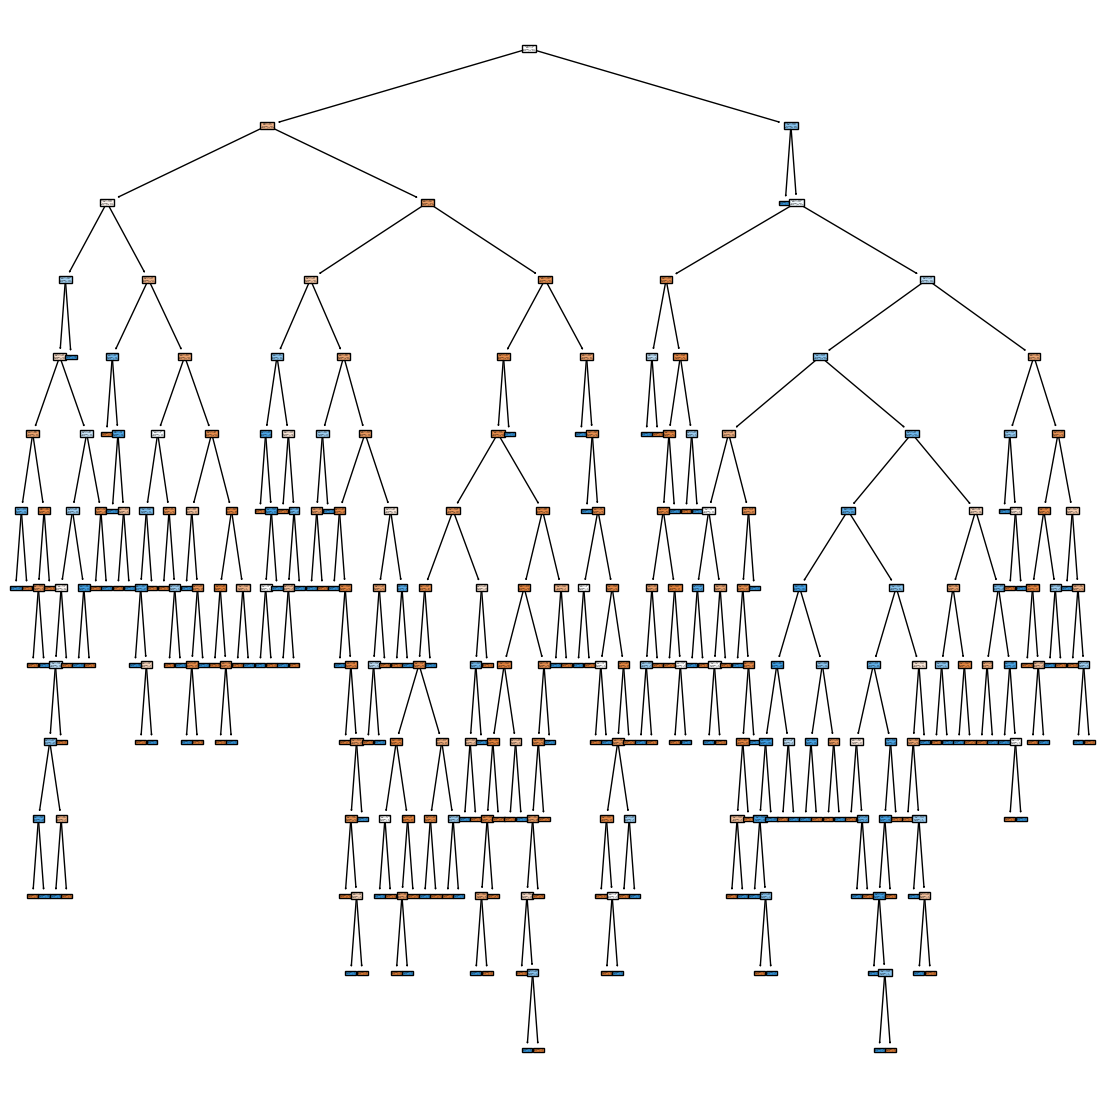

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(14,14))
plot_tree(model, filled = True);

### Hyper Parameter Tuning: Control max_depth

In [ ]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

max_depths = [1,4,5,6,10,50]

for depth in max_depths:
    print("*"*50)
    print("Max Depth:",depth )
    # create instance of DT Class:
    model = DecisionTreeClassifier(criterion='entropy',max_depth=depth)
    # fit model
    model.fit(X_train, y_train)

    # Calculate Train and Test Acc Scores
    print("Train Acc:", model.score(X_train, y_train))
    print("Test Acc:", model.score(X_test, y_test))

**************************************************
Max Depth: 1
Train Acc: 0.7121212121212122
Test Acc: 0.6657608695652174
**************************************************
Max Depth: 4
Train Acc: 0.8371212121212122
Test Acc: 0.7934782608695652
**************************************************
Max Depth: 5
Train Acc: 0.8712121212121212
Test Acc: 0.7880434782608695
**************************************************
Max Depth: 6
Train Acc: 0.9020562770562771
Test Acc: 0.8179347826086957
**************************************************
Max Depth: 10
Train Acc: 0.9848484848484849
Test Acc: 0.7961956521739131
**************************************************
Max Depth: 50
Train Acc: 1.0
Test Acc: 0.7771739130434783


In [ ]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=4)


In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(model,X_train, y_train,scoring='accuracy',cv=5)

array([0.53243243, 0.85945946, 0.85405405, 0.82113821, 0.82926829])

In [ ]:
cross_val_score(model,X_train, y_train,scoring='accuracy',cv=5).mean()

0.7792704900021973

In [ ]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# create instance of DT Class:
model = DecisionTreeClassifier(criterion='gini',max_depth=5 )

# fit model
model.fit(X_train, y_train)

# Calculate Train and Test Acc Scores
print("Train Acc:", model.score(X_train, y_train))
print("Test Acc:", model.score(X_test, y_test))

Train Acc: 0.8744588744588745
Test Acc: 0.7771739130434783


In [ ]:
model.feature_importances_

array([0.00465332, 0.        , 0.        , 0.        , 0.04297425,
       0.        , 0.        , 0.        , 0.07337273, 0.        ,
       0.06922284, 0.06524467, 0.04091913, 0.01357214, 0.        ,
       0.        , 0.        , 0.        , 0.00418791, 0.02534623,
       0.01753568, 0.02294701, 0.        , 0.        , 0.        ,
       0.01402761, 0.        , 0.        , 0.03416428, 0.00737436,
       0.        , 0.09861734, 0.        , 0.        , 0.        ,
       0.4658405 ])

In [ ]:
X_train.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single'],
      dtype='object')

In [ ]:
sorted(list(zip(X_train.columns, model.feature_importances_)), key = lambda x:x[1], reverse=True)

[('MaritalStatus_Single', 0.4658404982251789),
 ('Department_Research & Development', 0.09861734408124727),
 ('JobInvolvement', 0.07337272969775267),
 ('JobRole', 0.06922284268914645),
 ('JobSatisfaction', 0.06524467165327101),
 ('EducationField', 0.0429742464664268),
 ('MonthlyIncome', 0.040919127941381146),
 ('BusinessTravel_Travel_Frequently', 0.034164282114585685),
 ('StockOptionLevel', 0.025346232774200318),
 ('TrainingTimesLastYear', 0.022947013209876625),
 ('TotalWorkingYears', 0.01753568213823034),
 ('YearsSinceLastPromotion', 0.014027607546947785),
 ('MonthlyRate', 0.01357213951342585),
 ('BusinessTravel_Travel_Rarely', 0.007374357871666429),
 ('Age', 0.004653317137197778),
 ('RelationshipSatisfaction', 0.004187906939464886),
 ('DailyRate', 0.0),
 ('DistanceFromHome', 0.0),
 ('Education', 0.0),
 ('EnvironmentSatisfaction', 0.0),
 ('Gender', 0.0),
 ('HourlyRate', 0.0),
 ('JobLevel', 0.0),
 ('NumCompaniesWorked', 0.0),
 ('OverTime', 0.0),
 ('PercentSalaryHike', 0.0),
 ('Performa

### Obj: Zip and Sort Features according the magnitude of FI Array and Plot it

1) Filter all features below a given threshold FI, rebuild and Evaluated model on remaining features(Feature Selection)

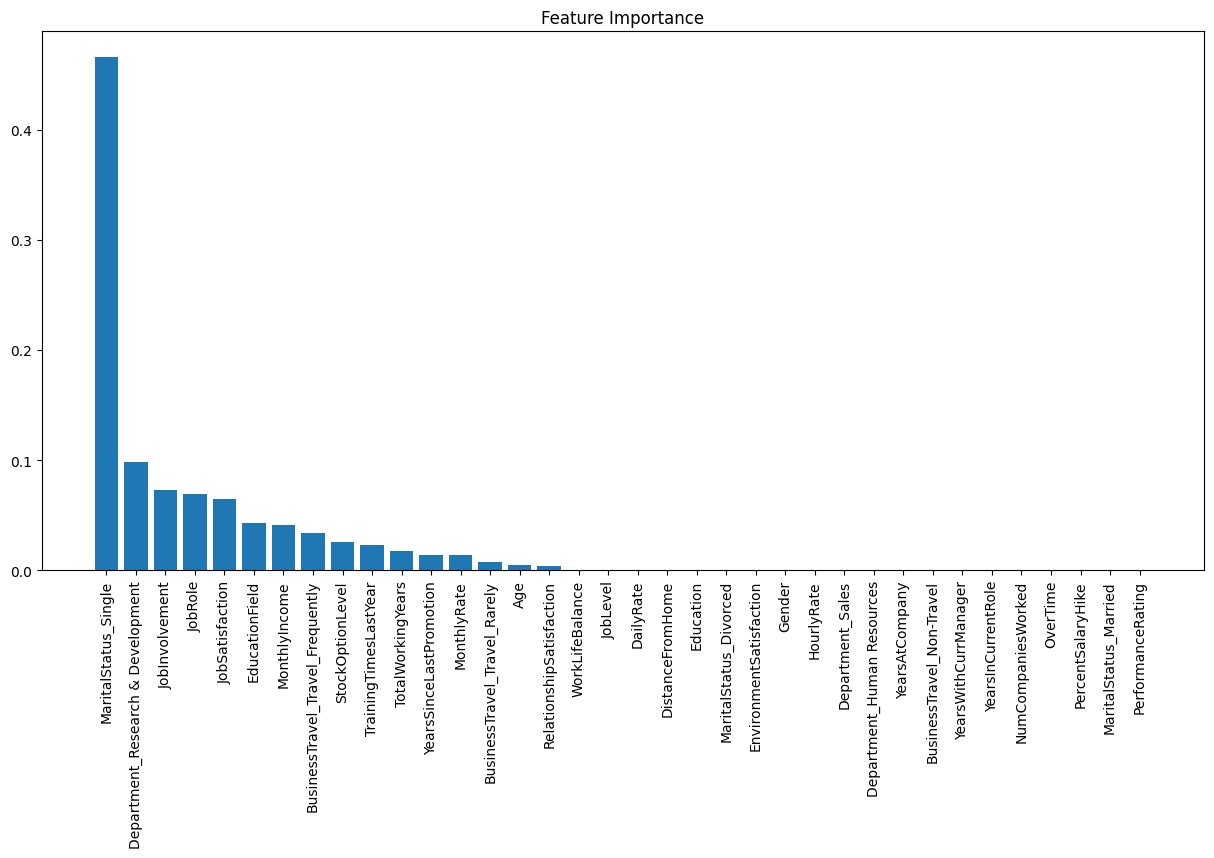

In [ ]:
# Feature Importance
import matplotlib.pyplot as plt

importances = model.feature_importances_

indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances

plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

### DT Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
### use DTRegressor on cars24

## Visualize Full Tree:


In [ ]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(X_train.columns) # get all cols in list
# Ensure the target variable 'Attrition' is not there in the feature list

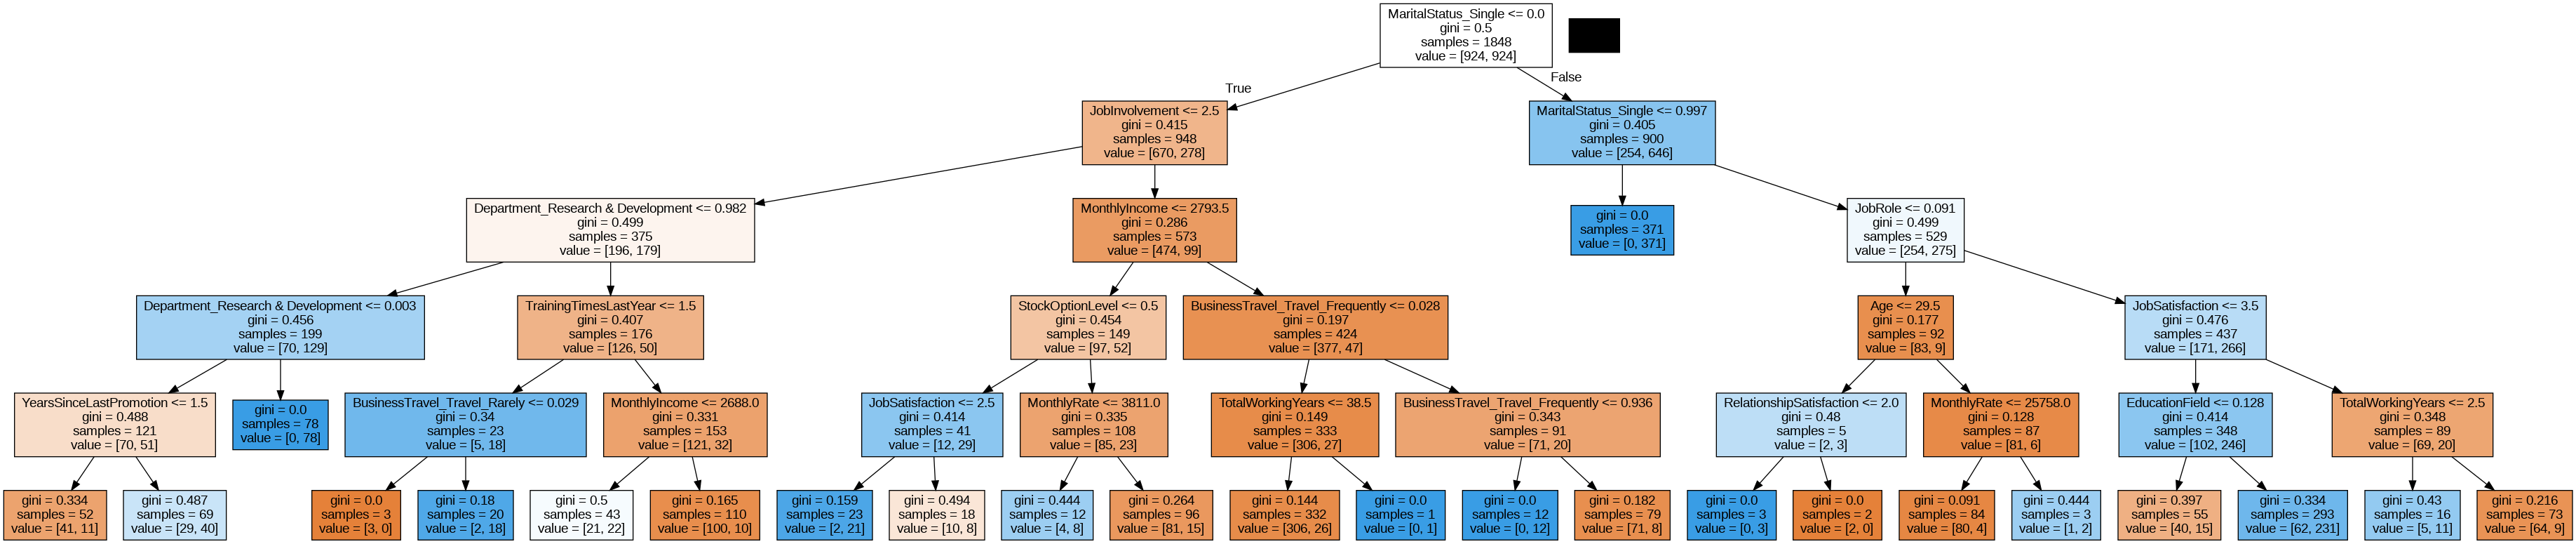

In [ ]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

### plot feature importance: